In [11]:
import pylab
import pandas as pd
import psycopg2
import psycopg2.extras
%pylab inline

schema = 'pop_cat_ss'
dbname = 'geonode-imports'
user = 'geonode'
password = 'geonode'
connection_string = "dbname=%s user=%s password=%s" % (dbname, user, password)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
conn = psycopg2.connect(connection_string)
cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)

             cat    cod          pop
24200_1_50     1  24200   1.0768e+06
24200_2_100    2  24200       724551
24200_3_100    3  24200       352248
24200_4_250    4  24200   1.0768e+06
24200_4_500    4  24200        36528
24200_5_1000   5  24200   1.0768e+06
24200_5_500    5  24200  1.04027e+06

[(1L, 1076799.0), (2L, 724551.0), (3L, 352248.0), (4L, 1076799.0), (4L, 36528.0), (5L, 1076799.0), (5L, 1040271.0)]


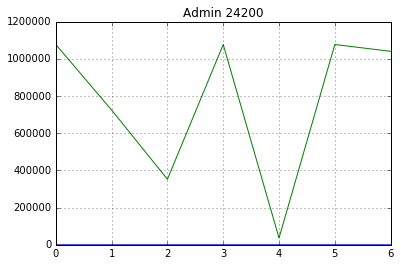

In [16]:
adm = 24200
sql = "SELECT * FROM pop_cat_ss.storm_philippines_ss WHERE code_adm ='" + str(adm) + "';"

cur.execute(sql)
risultati = cur.fetchall()
dizio_e_caio = {}
for risultato in risultati:
    dizio_e_caio[risultato[0]] = {}
    dizio_e_caio[risultato[0]]['cat'] = risultato[1]
    dizio_e_caio[risultato[0]]['cod'] = risultato[2]
    dizio_e_caio[risultato[0]]['pop'] = risultato[4]

df_people = pd.DataFrame.from_dict(dizio_e_caio).transpose()
print df_people
categories = df_people['cat']
population = df_people['pop']
selezione = zip(categories,population)

print
print selezione
plt.title('Admin 24200')
plt.plot(selezione)
plt.grid(b = 'on')
plt.show()

# df_people.plot(kind='line')

In [4]:
sql = "SELECT * FROM pop_cat_ss.storm_philippines_ss;"
cur.execute(sql)
risultati_tot = cur.fetchall()
dizio_e_caio_phl = {}
for risultato_tot in risultati_tot:
    dizio_e_caio_phl[risultato_tot[0]] = {}
    dizio_e_caio_phl[risultato_tot[0]]['cat'] = risultato_tot[1]
    dizio_e_caio_phl[risultato_tot[0]]['cod'] = risultato_tot[2]
    dizio_e_caio_phl[risultato_tot[0]]['pop'] = risultato_tot[4]

# print dizio_e_caio_phl

df_people_tot_phl = pd.DataFrame.from_dict(dizio_e_caio_phl).transpose().sort_index(axis=0)
df_people_tot_phl['indice_unico'] = df_people_tot_phl.index
df_people_tot_phl['rp'] = df_people_tot_phl['indice_unico'].apply(lambda x: pd.Series(x.split(',')))
df_people_tot_phl['rp'] = df_people_tot_phl['rp'].apply(lambda x: pd.Series(x.split('_')[2]))
df_gruppato = df_people_tot_phl.groupby(['cod','cat','rp'])['pop'].sum()

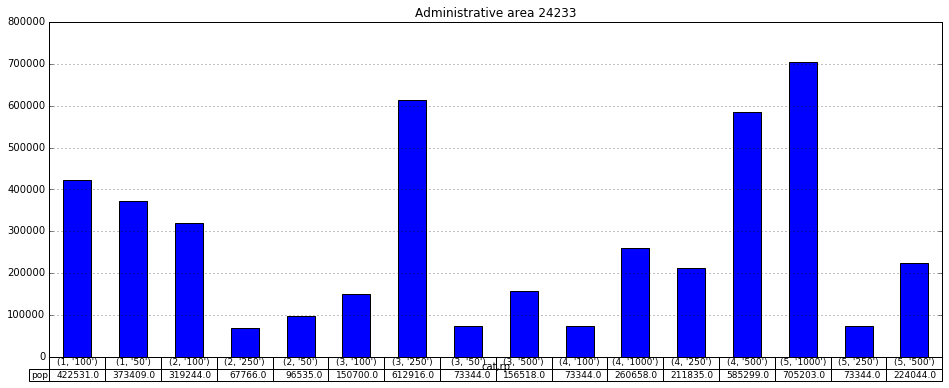

cat  rp  
1    100     422531
     50      373409
2    100     319244
     250      67766
     50       96535
3    100     150700
     250     612916
     50       73344
     500     156518
4    100      73344
     1000    260658
     250     211835
     500     585299
5    1000    705203
     250      73344
     500     224044
Name: pop, dtype: float64


In [13]:
area_codice = '24233'
area_speciale = df_gruppato.loc[area_codice,]
area_speciale.plot(kind='bar', figsize=(16, 6),table = True)
plt.xticks([])
plt.title("Administrative area " + area_codice)
plt.grid(b='on',)
plt.show()
print area_speciale
area_speciale.to_clipboard()